In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import timeit

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
from sklearn import metrics

In [29]:
def minMaxScaling(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    return pd.DataFrame(data=scaler.transform(data), columns = data.columns)

In [30]:
data = pd.read_csv('MinMaxScaledData.csv')
data = minMaxScaling(data)
X = data.drop('Appliances', axis=1)
y = data['Appliances']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
def getErrorScoreWithVariableK() :
    errorRate = []
    for i in range(1,40):
        knn = KNeighborsRegressor(n_neighbors = i, n_jobs=-1)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
#     elapsedTime = timeit.default_timer() - startTime
#     print("time taken : ",elapsedTime)
        error = np.sqrt(metrics.mean_squared_error(y_test, predictions))
#     print('\tError rate : ',error)
        errorRate.append(error)
    plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

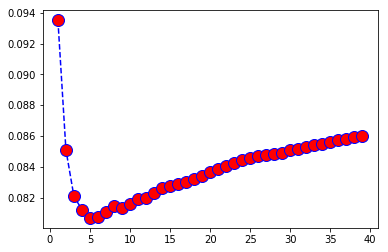

In [33]:
getErrorScoreWithVariableK()

<h3>Considering n_neighbors = 5</h3>

In [34]:
def getScore(X_train, y_train, X_test, y_test) :
    startTime = timeit.default_timer()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler = StandardScaler()
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    KNN = KNeighborsRegressor(n_neighbors = 5, n_jobs=-1)
    KNN.fit(X_train, y_train)
    predictions = KNN.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    MAE = metrics.mean_absolute_error(y_test, predictions)
    MSE = metrics.mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(MSE)
    print('Mean Absolute Error : ',MAE)
    print('Mean Squared Error : ',MSE)
    print('Root Mean Squared Error : ',RMSE)

In [35]:
getScore(X_train, y_train, X_test, y_test)

time taken :  1.5343560044715332
Mean Absolute Error :  0.037451767928358665
Mean Squared Error :  0.006128814817155986
Root Mean Squared Error :  0.0782867473915987


In [36]:
scoreTable = data.corr(method='pearson')

In [37]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
lights,1.0,-0.024,0.11,-0.0056,0.051,-0.097,0.13,-0.0089,0.11,-0.079,0.14,-0.079,0.15,-0.14,0.035,-0.071,0.013,-0.16,-0.0088,-0.074,-0.011,0.069,0.06,0.02,-0.036,0.00052,0.00052,0.2
T1,-0.024,1.0,0.16,0.84,-0.0025,0.89,-0.029,0.88,0.098,0.89,-0.015,0.65,-0.62,0.84,0.14,0.83,-0.0064,0.84,0.072,0.68,-0.15,-0.35,-0.088,-0.076,0.57,-0.0062,-0.0062,0.055
RH_1,0.11,0.16,1.0,0.27,0.8,0.25,0.84,0.11,0.88,0.21,0.3,0.32,0.25,0.021,0.8,-0.03,0.74,0.12,0.76,0.34,-0.29,0.27,0.2,-0.021,0.64,-0.0007,-0.0007,0.086
T2,-0.0056,0.84,0.27,1.0,-0.17,0.74,0.12,0.76,0.23,0.72,0.03,0.8,-0.58,0.66,0.23,0.58,0.069,0.68,0.16,0.79,-0.13,-0.51,0.052,-0.07,0.58,-0.011,-0.011,0.12
RH_2,0.051,-0.0025,0.8,-0.17,1.0,0.14,0.68,-0.047,0.72,0.11,0.25,-0.0097,0.39,-0.051,0.69,-0.041,0.68,0.055,0.68,0.034,-0.26,0.58,0.069,-0.0054,0.5,0.0063,0.0063,-0.06
T3,-0.097,0.89,0.25,0.74,0.14,1.0,-0.011,0.85,0.12,0.89,-0.066,0.69,-0.65,0.85,0.17,0.8,0.044,0.9,0.13,0.7,-0.19,-0.28,-0.1,-0.1,0.65,-0.0052,-0.0052,0.085
RH_3,0.13,-0.029,0.84,0.12,0.68,-0.011,1.0,-0.14,0.9,-0.05,0.38,0.077,0.51,-0.25,0.83,-0.28,0.83,-0.2,0.83,0.12,-0.23,0.36,0.26,0.017,0.41,-0.00048,-0.00048,0.036
T4,-0.0089,0.88,0.11,0.76,-0.047,0.85,-0.14,1.0,-0.049,0.87,-0.076,0.65,-0.7,0.88,0.044,0.8,-0.095,0.89,-0.026,0.66,-0.075,-0.39,-0.19,-0.1,0.52,-0.0018,-0.0018,0.04
RH_4,0.11,0.098,0.88,0.23,0.72,0.12,0.9,-0.049,1.0,0.092,0.35,0.26,0.39,-0.13,0.89,-0.17,0.85,-0.045,0.86,0.29,-0.25,0.34,0.3,0.0026,0.62,-0.0018,-0.0018,0.017
T5,-0.079,0.89,0.21,0.72,0.11,0.89,-0.05,0.87,0.092,1.0,0.033,0.63,-0.63,0.87,0.15,0.82,0.016,0.91,0.072,0.65,-0.17,-0.27,-0.15,-0.084,0.59,-0.0055,-0.0055,0.02


In [38]:
FeatureIndices = scoreTable.index.tolist()

In [39]:
def sortDic(UnsortedDictionary):
    dicItems = [(value,key) for key,value in UnsortedDictionary.items()]
    dicItems.sort()
    dicItems.reverse()
    dicItems = {key:value for value,key in dicItems}
    return dicItems

In [40]:
FeatureScoresForTargetVariable = {}

In [41]:
for i in FeatureIndices[:-1]:
    FeatureScoresForTargetVariable[i] = scoreTable.loc[i][FeatureIndices[-1]]

In [62]:
FeatureScoresForTargetVariable = sortDic(FeatureScoresForTargetVariable)
print(FeatureScoresForTargetVariable)

{'lights': 0.19727755999010302, 'T2': 0.12007328295755802, 'T6': 0.11763768937551015, 'T_out': 0.09915467998032984, 'Windspeed': 0.08712210576349999, 'RH_1': 0.08603142528492509, 'T3': 0.08505990253869669, 'T1': 0.05544747194220067, 'T4': 0.040280983130662085, 'T8': 0.03957198126209111, 'RH_3': 0.03629172104744544, 'T7': 0.025801044763464398, 'T5': 0.01975986073654099, 'RH_4': 0.01696543130336212, 'Tdewpoint': 0.015356636151235312, 'T9': 0.010010284788498311, 'RH_5': 0.006954536223016289, 'Visibility': 0.00023035789593491997, 'rv2': -0.011144917497938741, 'rv1': -0.011144917497938741, 'Press_mm_hg': -0.0348848291039675, 'RH_9': -0.05146201134289545, 'RH_7': -0.055642418346175594, 'RH_2': -0.06046476002568845, 'RH_6': -0.08317760710059757, 'RH_8': -0.09403862705798324, 'RH_out': -0.1522823808333926}


In [63]:
errorRate = []
#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
def trainTestScore(X_train, y_train, X_test, y_test):
    startTime = timeit.default_timer()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler = StandardScaler()
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    KNN = KNeighborsRegressor(n_neighbors = 5, n_jobs=-1)
    KNN.fit(X_train, y_train)
    predictions = KNN.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    print('\tError rate : ',error)
    errorRate.append(error)
    return error

In [70]:
Features = list(FeatureScoresForTargetVariable.keys())
def selectNextBestFeature(FeatureSubset, featureIndex) :
    while featureIndex<len(Features):
        checkFeature = Features[featureIndex]
        noMatchWithAnyone = True
        if len(FeatureSubset) == 0:
            noMatchWithAnyone = True
        else:
            for feature in FeatureSubset:
                print('feature:',feature,'\tkey:',checkFeature)
                if(scoreTable.loc[str(feature)][checkFeature] >= 0.7):
                    noMatchWithAnyone = False
                    break          
        if(noMatchWithAnyone == True):
            return checkFeature, featureIndex
        featureIndex += 1

In [57]:
def scoresForFeatures():
    noOfFeatures = 3
#     while noOfFeatures <=36:
    i = 0
    scores = []
    FinalSubset = []
    LeastError = 100
    featureIndex = -1
    while i<noOfFeatures and featureIndex<len(Features)-1:
        Subset = FinalSubset[:]
        feature, featureIndex = selectNextBestFeature(FinalSubset, featureIndex+1 )
        Subset.append(feature)
        error = trainTestScore(X_train.loc[:,Subset], y_train, X_test.loc[:, Subset], y_test)
        if(error < LeastError):
            FinalSubset = Subset[:]
            LeastError = error
            i += 1
        print("feature subset : ",Subset, "error : ", error)
        print("\n\n\nBest feature subset : ",FinalSubset, "error : ", LeastError)
    if(i<noOfFeatures):
        print("ONLY ",i," NO OF FEATURES HAS BEEN SELECTED, AS THIS SUBSET IS PRODUCING THE LOWEST POSSIBLE ERROR")
    return FinalSubset

In [71]:
bestFeatureSubset = scoresForFeatures()

time taken :  1.9209245569072664
	Error rate :  0.09703529039292591
feature subset :  ['lights'] error :  0.09703529039292591



Best feature subset :  ['lights'] error :  0.09703529039292591
feature: lights 	key: T2
time taken :  0.303939834396715
	Error rate :  0.10043438853735501
feature subset :  ['lights', 'T2'] error :  0.10043438853735501



Best feature subset :  ['lights'] error :  0.09703529039292591
feature: lights 	key: T6
time taken :  0.32285308749783326
	Error rate :  0.10181538755691563
feature subset :  ['lights', 'T6'] error :  0.10181538755691563



Best feature subset :  ['lights'] error :  0.09703529039292591
feature: lights 	key: T_out
time taken :  0.2868925341972499
	Error rate :  0.0989706580412821
feature subset :  ['lights', 'T_out'] error :  0.0989706580412821



Best feature subset :  ['lights'] error :  0.09703529039292591
feature: lights 	key: Windspeed
time taken :  0.4131390390912202
	Error rate :  0.09896548985834348
feature subset :  ['lights', 'Winds

In [72]:
getScore(X_train.loc[:,bestFeatureSubset], y_train, X_test.loc[:, bestFeatureSubset], y_test)

time taken :  1.9178935212180477
Mean Absolute Error :  0.06043785898805466
Mean Squared Error :  0.009415847581639459
Root Mean Squared Error :  0.09703529039292591


<h5>Here comparatively less time(0.0044ms compared to 0.0667ms taking only 7% of the time taken by the whole dataset)  is taken by the algorithm with the cost of slightly higher error (0.0944 compared to 0.0874 from the whole dataset).</h5>